**Лабораторная работа №4: Классификация. Деревья решений**

**Выполнила: Мишагина Валерия 6133**



Датасет -  [Bike Sharing Dateset](https://www.kaggle.com/datasets/rishabhbarman/bike-sharing-dateset)

**№1.** Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [4]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [5]:
data = pd.read_csv('day.csv')

**№2.** Привести описание датасета.

In [6]:
# информация о данных в DataFrame, тип данных признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
data.shape

(731, 16)

In [8]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные"**




In [9]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
data['is_success_day'] = data["cnt"].apply(lambda e:   e > 5500)

In [11]:
data['is_success_day'].value_counts()

is_success_day
False    508
True     223
Name: count, dtype: int64

In [12]:
data.drop('instant', axis=1, inplace=True)
data.drop('dteday', axis=1, inplace=True)
data.drop('registered', axis=1, inplace=True)
data.drop('cnt', axis=1, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed       731 non-null    float64
 11  casual          731 non-null    int64  
 12  is_success_day  731 non-null    bool   
dtypes: bool(1), float64(4), int64(8)
memory usage: 69.4 KB


**Нормализовать данные** (`StandardScaler` или `MinMaxScaler`)



In [14]:
x = data.drop('is_success_day', axis=1)
y = data['is_success_day']
cols = list(x.columns)

In [15]:
scaler = StandardScaler()
scaler.fit(x[cols])
scaled = scaler.transform(x[cols])
x = pd.DataFrame(scaled, columns=cols)

**Разбить выборку на обучающую и тестовую**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

In [17]:
# размерности выборок
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (548, 12)
y_train shape: (548,)
X_test shape: (183, 12)
y_test shape: (183,)


# Дерево решений

**№3.1** С использованием `GridSearchCV` осуществить подбор гиперпараметра `DecisionTreeClassifier` (как минимум `max_depth`, `max_features`, другие параметры - по желанию.)

In [18]:
grid = {
    'max_depth': range(1, x.shape[1]),
    'max_features': range(2, 15),
    'min_samples_leaf': range(5, 20)
}

In [19]:
model = DecisionTreeClassifier()
search = GridSearchCV(model, grid, cv = 5)
search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 12),
                         'max_features': range(2, 15),
                         'min_samples_leaf': range(5, 20)})

**№3.2** Вывести значения гиперпараметра и метрик для наилучшей модели `DecisionTreeClassifier`

In [20]:
search.best_params_

{'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 5}

In [21]:
best_model = search.best_estimator_

Для тренировочной выбоки

In [22]:
print(f'Accuracy:{accuracy_score(y_train, best_model.predict(x_train))}')
print(f'Precision:{precision_score(y_train, best_model.predict(x_train))}')
print(f'Recall:{recall_score(y_train, best_model.predict(x_train))}')
print(f'F-measure:{f1_score(y_train, best_model.predict(x_train))}')

Accuracy:0.9507299270072993
Precision:0.9111111111111111
Recall:0.9371428571428572
F-measure:0.923943661971831


Для тестовой выборки

In [23]:
print(f'Accuracy:{accuracy_score(y_test, best_model.predict(x_test))}')
print(f'Precision:{precision_score(y_test, best_model.predict(x_test))}')
print(f'Recall:{recall_score(y_test, best_model.predict(x_test))}')
print(f'F-measure:{f1_score(y_test, best_model.predict(x_test))}')

Accuracy:0.912568306010929
Precision:0.82
Recall:0.8541666666666666
F-measure:0.836734693877551


**№3.3** Для полученного наилучшего дерева вывести `feature_importances`, отсортировать их по убыванию

In [24]:
best_model.feature_importances_

array([0.01574947, 0.40666659, 0.00120384, 0.        , 0.02902693,
       0.        , 0.        , 0.24455226, 0.00342001, 0.03861691,
       0.02577478, 0.23498922])

In [25]:
sorted(zip(x.columns, best_model.feature_importances_), key=lambda x: x[1], reverse=True)

[('yr', 0.40666658638806263),
 ('temp', 0.24455226155896748),
 ('casual', 0.23498921920485602),
 ('hum', 0.038616905403346675),
 ('weekday', 0.029026931005326537),
 ('windspeed', 0.02577477977638247),
 ('season', 0.015749469632930325),
 ('atemp', 0.003420005199798733),
 ('mnth', 0.0012038418303291507),
 ('holiday', 0.0),
 ('workingday', 0.0),
 ('weathersit', 0.0)]

**№3.4** Осуществить фильтрацию признаков (по какому-нибудь значению порога важности признака).

In [90]:
features_sort = sorted(zip(x.columns, best_model.feature_importances_), key=lambda x: x[1], reverse=True)

In [91]:
features_new_tree = [key for key, val in features_sort if val > 0.05]
features_new_tree

['yr', 'temp', 'casual']

**№3.5** Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.

In [92]:
x_train_filtered = x_train[features_new_tree]
x_test_filtered = x_test[features_new_tree]

In [29]:
model = DecisionTreeClassifier()
search_filter = GridSearchCV(model, grid, cv = 5)
search_filter.fit(x_train_filtered, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 12),
                         'max_features': range(2, 15),
                         'min_samples_leaf': range(5, 20)})

**№3.6** Вывести полученные гиперпараметры лучшей модели

In [30]:
search.best_params_

{'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 5}

№3.7 Сравнить метрики до и после фильтрации признаков лучших моделей

In [31]:
best_model_filter = search_filter.best_estimator_

Для тренировочной выбоки

In [32]:
print(f'Accuracy:{accuracy_score(y_train, best_model_filter.predict(x_train_filtered))}')
print(f'Precision:{precision_score(y_train, best_model_filter.predict(x_train_filtered))}')
print(f'Recall:{recall_score(y_train, best_model_filter.predict(x_train_filtered))}')
print(f'F-measure:{f1_score(y_train, best_model_filter.predict(x_train_filtered))}')

Accuracy:0.9452554744525548
Precision:0.9050279329608939
Recall:0.9257142857142857
F-measure:0.9152542372881357


Для тестовой выборки

In [33]:
print(f'Accuracy:{accuracy_score(y_test, best_model_filter.predict(x_test_filtered))}')
print(f'Precision:{precision_score(y_test, best_model_filter.predict(x_test_filtered))}')
print(f'Recall:{recall_score(y_test, best_model_filter.predict(x_test_filtered))}')
print(f'F-measure:{f1_score(y_test, best_model_filter.predict(x_test_filtered))}')

Accuracy:0.9180327868852459
Precision:0.851063829787234
Recall:0.8333333333333334
F-measure:0.8421052631578947


Метрики для тренировочной выборки на отфильтрованных данных немного ухудшились, для тестовой - немного улучшились




# Случайный лес

**№4.1** Построить случайный лес (`RandomForestClassifier`), c использованием `GridSearchCV` осуществить подбор гиперпараметра

In [34]:
forest_model = RandomForestClassifier()

In [35]:
forest_grid = {
    'max_depth': range(1, x.shape[1]),
    'n_estimators': range(10, 151, 10)
}

In [36]:
forest_search = GridSearchCV(forest_model, forest_grid, cv = 5)
forest_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 12),
                         'n_estimators': range(10, 151, 10)})

**№4.2** Вывести полученные гиперпараметры лучшей модели случайного леса

In [37]:
forest_search.best_params_

{'max_depth': 11, 'n_estimators': 60}

In [38]:
best_forest_model = forest_search.best_estimator_

**№4.3** Осуществить фильтрацию признаков

In [95]:
features_sort = sorted(zip(x.columns, best_forest_model.feature_importances_), key=lambda x: x[1], reverse=True)
features_sort

[('yr', 0.365364769607241),
 ('casual', 0.19326210971855912),
 ('temp', 0.12186951826535772),
 ('atemp', 0.08717209308167301),
 ('hum', 0.0550091552887824),
 ('mnth', 0.045213354672329835),
 ('season', 0.04099701809738026),
 ('windspeed', 0.03805009901970995),
 ('weekday', 0.02767161471887744),
 ('weathersit', 0.013107301936329105),
 ('workingday', 0.011031508716939418),
 ('holiday', 0.0012514568768209034)]

In [96]:
features_new_forest = [key for key, val in features_sort if val > 0.05]
features_new_forest

['yr', 'casual', 'temp', 'atemp', 'hum']

**№4.4** Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками

In [97]:
x_train_filtered_forest = x_train[features_new_forest]
x_test_filtered_forest = x_test[features_new_forest]

In [62]:
forest_search_filter = GridSearchCV(forest_model, forest_grid, cv = 5)
forest_search_filter.fit(x_train_filtered_forest, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 12),
                         'n_estimators': range(10, 151, 10)})

**№4.5** Вывести полученные гиперпараметры лучшей модели случайного леса

In [63]:
forest_search_filter.best_params_

{'max_depth': 11, 'n_estimators': 60}

In [64]:
best_forest_filter_model = forest_search_filter.best_estimator_

**№4.6** Сравнить метрики до и после фильтрации признаков лучших моделей

До фильтрации

Для тренировочной выборки

In [46]:
print(f'Accuracy:{accuracy_score(y_train, best_forest_model.predict(x_train))}')
print(f'Precision:{precision_score(y_train, best_forest_model.predict(x_train))}')
print(f'Recall:{recall_score(y_train, best_forest_model.predict(x_train))}')
print(f'F-measure:{f1_score(y_train, best_forest_model.predict(x_train))}')

Accuracy:1.0
Precision:1.0
Recall:1.0
F-measure:1.0


Для тестовой выборки

In [47]:
print(f'Accuracy:{accuracy_score(y_test, best_forest_model.predict(x_test))}')
print(f'Precision:{precision_score(y_test, best_forest_model.predict(x_test))}')
print(f'Recall:{recall_score(y_test, best_forest_model.predict(x_test))}')
print(f'F-measure:{f1_score(y_test, best_forest_model.predict(x_test))}')

Accuracy:0.9344262295081968
Precision:0.875
Recall:0.875
F-measure:0.875


После фильтрации

Для тренировочной выборки

In [65]:
print(f'Accuracy:{accuracy_score(y_train, best_forest_filter_model.predict(x_train_filtered_forest))}')
print(f'Precision:{precision_score(y_train, best_forest_filter_model.predict(x_train_filtered_forest))}')
print(f'Recall:{recall_score(y_train, best_forest_filter_model.predict(x_train_filtered_forest))}')
print(f'F-measure:{f1_score(y_train, best_forest_filter_model.predict(x_train_filtered_forest))}')

Accuracy:1.0
Precision:1.0
Recall:1.0
F-measure:1.0


Для тестовой выборки

In [66]:
print(f'Accuracy:{accuracy_score(y_test, best_forest_filter_model.predict(x_test_filtered_forest))}')
print(f'Precision:{precision_score(y_test, best_forest_filter_model.predict(x_test_filtered_forest))}')
print(f'Recall:{recall_score(y_test, best_forest_filter_model.predict(x_test_filtered_forest))}')
print(f'F-measure:{f1_score(y_test, best_forest_filter_model.predict(x_test_filtered_forest))}')

Accuracy:0.9180327868852459
Precision:0.851063829787234
Recall:0.8333333333333334
F-measure:0.8421052631578947


Метрики после фильтрации признаков для тренировочной выборки не изменились - для тестовой - ухудшились

# Метод ближайших соседей

**№5.1** С использованием `GridSearchCV` осуществить подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`)

In [52]:
knn_model = KNeighborsClassifier()

In [53]:
knn_grid = {
    'n_neighbors': range(2, 21),
}

In [54]:
knn_search = GridSearchCV(knn_model, knn_grid, cv = 5)
knn_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21)})

**№5.2** Вывести значения гиперпараметра и метрик для наилучшей модели

In [67]:
knn_search.best_params_

{'n_neighbors': 20}

In [68]:
best_knn_model = knn_search.best_estimator_

Для тренировочной выборки

In [69]:
print(f'Accuracy:{accuracy_score(y_train, best_knn_model.predict(x_train))}')
print(f'Precision:{precision_score(y_train, best_knn_model.predict(x_train))}')
print(f'Recall:{recall_score(y_train, best_knn_model.predict(x_train))}')
print(f'F-measure:{f1_score(y_train, best_knn_model.predict(x_train))}')

Accuracy:0.9397810218978102
Precision:0.9127906976744186
Recall:0.8971428571428571
F-measure:0.9048991354466859


Для тестовой выборки

In [70]:
print(f'Accuracy:{accuracy_score(y_test, best_knn_model.predict(x_test))}')
print(f'Precision:{precision_score(y_test, best_knn_model.predict(x_test))}')
print(f'Recall:{recall_score(y_test, best_knn_model.predict(x_test))}')
print(f'F-measure:{f1_score(y_test, best_knn_model.predict(x_test))}')

Accuracy:0.9180327868852459
Precision:0.851063829787234
Recall:0.8333333333333334
F-measure:0.8421052631578947


**№5.3** Осуществить фильтрацию признаков

'KNeighborsClassifier' object has no attribute 'feature_importances_' поэтому возьмем признаки, полученные при фильтрации для `RandomForestClassifier`

In [102]:
x_train.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
season,1.000000,-0.013320,0.830982,-0.028850,-0.027535,0.026397,0.024633,0.318477,0.325455,0.179243,-0.258819,0.189229
yr,-0.013320,1.000000,-0.041268,0.009872,-0.014600,0.018143,-0.068686,0.064717,0.061637,-0.093885,-0.033768,0.262045
mnth,0.830982,-0.041268,1.000000,0.016612,-0.016513,-0.002794,0.038425,0.209192,0.214966,0.196592,-0.219949,0.104958
holiday,-0.028850,0.009872,0.016612,1.000000,-0.091465,-0.260131,-0.033581,-0.062714,-0.066230,-0.031144,0.044381,0.009413
weekday,-0.027535,-0.014600,-0.016513,-0.091465,1.000000,0.024343,0.027050,-0.033850,-0.042888,-0.040536,-0.002891,0.051889
workingday,0.026397,0.018143,-0.002794,-0.260131,0.024343,1.000000,0.077913,0.073123,0.068822,0.036509,-0.012440,-0.514129
weathersit,0.024633,-0.068686,0.038425,-0.033581,0.027050,0.077913,1.000000,-0.173049,-0.174411,0.594902,0.033285,-0.293329
temp,0.318477,0.064717,0.209192,-0.062714,-0.033850,0.073123,-0.173049,1.000000,0.990087,0.083162,-0.161077,0.523887
atemp,0.325455,0.061637,0.214966,-0.066230,-0.042888,0.068822,-0.174411,0.990087,1.000000,0.096081,-0.186430,0.525445
hum,0.179243,-0.093885,0.196592,-0.031144,-0.040536,0.036509,0.594902,0.083162,0.096081,1.000000,-0.222775,-0.102482


In [121]:
corr_matrix = x_train.corr()
# зануляем главную диагональ в матрице корреляции
np.fill_diagonal(corr_matrix.values, 0)
# отфильтровываем по порогу и группируем отфильтрованные значения по каждому признаку, вычисляя сумму
feature_list = (corr_matrix.abs() > 0.6).sum(axis=1)
# сортируем по убыванию
feature_sort_list = feature_list.sort_values(ascending=False)
# фильтруем
new_features_knn = feature_sort_list[feature_sort_list > 0].index
new_features_knn

Index(['season', 'mnth', 'temp', 'atemp'], dtype='object')

**№5.4** Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками

In [122]:
x_train_filtered_knn = x_train[new_features_knn]
x_test_filtered_knn = x_test[new_features_knn]

In [123]:
knn_search_filter = GridSearchCV(knn_model, knn_grid, cv = 5)
knn_search_filter.fit(x_train_filtered_knn, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21)})

In [124]:
best_knn_filter_model = knn_search_filter.best_estimator_

**№5.5** Вывести полученные гиперпараметры лучшей модели

In [125]:
knn_search_filter.best_params_

{'n_neighbors': 2}

**№5.6** Сравнить метрики до и после фильтрации признаков

После фильтрации

Для тренировочной выборки

In [126]:
print(f'Accuracy:{accuracy_score(y_train, best_knn_filter_model.predict(x_train_filtered_knn))}')
print(f'Precision:{precision_score(y_train, best_knn_filter_model.predict(x_train_filtered_knn))}')
print(f'Recall:{recall_score(y_train, best_knn_filter_model.predict(x_train_filtered_knn))}')
print(f'F-measure:{f1_score(y_train, best_knn_filter_model.predict(x_train_filtered_knn))}')

Accuracy:0.822992700729927
Precision:1.0
Recall:0.44571428571428573
F-measure:0.616600790513834


Для тестовой выборки

In [127]:
print(f'Accuracy:{accuracy_score(y_test, best_knn_filter_model.predict(x_test_filtered_knn))}')
print(f'Precision:{precision_score(y_test, best_knn_filter_model.predict(x_test_filtered_knn))}')
print(f'Recall:{recall_score(y_test, best_knn_filter_model.predict(x_test_filtered_knn))}')
print(f'F-measure:{f1_score(y_test, best_knn_filter_model.predict(x_test_filtered_knn))}')

Accuracy:0.73224043715847
Precision:0.47619047619047616
Recall:0.20833333333333334
F-measure:0.28985507246376807


Метрики ухудшились

**№6.** Если наблюдается улучшение метрик после фильтрации признаков хотя бы для одной из моделей, то для набора отфильтрованных признаков (пересечение множеств отфильтрованных признаков каждой модели или объединение множеств – не особо важно, главное описать, каким образом получен новый subset данных) заново построить наилучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, сравнить модели в пункте 7 на одинаковом полученном наборе отфильтрованных признаков.

Для модели дерева решений метрики на тестовой выборке немного улучшились. Значит, будем выполнять этот пункт. Найдем объединение  множеств отфильтрованных признаков каждой модели.

In [130]:
new_features_general = list(set(features_new_tree) | set(features_new_forest) | set(new_features_knn))
new_features_general

['temp', 'mnth', 'season', 'casual', 'hum', 'yr', 'atemp']

In [131]:
x_train_filtered_general = x_train[new_features_general]
x_test_filtered_general = x_test[new_features_general]

In [132]:
knn_search_general = GridSearchCV(knn_model, knn_grid, cv = 5)
knn_search_general.fit(x_train_filtered_general, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21)})

In [134]:
best_knn_general_model = knn_search_general.best_estimator_

In [133]:
forest_search_general = GridSearchCV(forest_model, forest_grid, cv = 5)
forest_search_general.fit(x_train_filtered_general, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 12),
                         'n_estimators': range(10, 151, 10)})

In [135]:
best_forest_general_model = forest_search_general.best_estimator_

In [141]:
tree_search_general = GridSearchCV(DecisionTreeClassifier(), grid, cv = 5)
tree_search_general .fit(x_train_filtered_general, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 12),
                         'max_features': range(2, 15),
                         'min_samples_leaf': range(5, 20)})

In [143]:
best_tree_general_model = tree_search_general.best_estimator_

# Оценка качества построенных моделей

**№7.1**  Сравнить модели на одинаковом полученном наборе отфильтрованных признаков

Для тренировочной выборки

In [144]:
#Дерево решений
print(f'Accuracy:{accuracy_score(y_train, best_tree_general_model.predict(x_train_filtered_general))}')
print(f'Precision:{precision_score(y_train, best_tree_general_model.predict(x_train_filtered_general))}')
print(f'Recall:{recall_score(y_train, best_tree_general_model.predict(x_train_filtered_general))}')
print(f'F-measure:{f1_score(y_train, best_tree_general_model.predict(x_train_filtered_general))}')

Accuracy:0.9507299270072993
Precision:0.9065934065934066
Recall:0.9428571428571428
F-measure:0.9243697478991596


In [145]:
#Случайный лес
print(f'Accuracy:{accuracy_score(y_train, best_forest_general_model.predict(x_train_filtered_general))}')
print(f'Precision:{precision_score(y_train, best_forest_general_model.predict(x_train_filtered_general))}')
print(f'Recall:{recall_score(y_train, best_forest_general_model.predict(x_train_filtered_general))}')
print(f'F-measure:{f1_score(y_train, best_forest_general_model.predict(x_train_filtered_general))}')

Accuracy:0.9963503649635036
Precision:0.9942857142857143
Recall:0.9942857142857143
F-measure:0.9942857142857143


In [147]:
#Метод ближайших соседей
print(f'Accuracy:{accuracy_score(y_train, best_knn_general_model.predict(x_train_filtered_general))}')
print(f'Precision:{precision_score(y_train, best_knn_general_model.predict(x_train_filtered_general))}')
print(f'Recall:{recall_score(y_train, best_knn_general_model.predict(x_train_filtered_general))}')
print(f'F-measure:{f1_score(y_train, best_knn_general_model.predict(x_train_filtered_general))}')

Accuracy:0.9452554744525548
Precision:0.9289940828402367
Recall:0.8971428571428571
F-measure:0.9127906976744186


Для тестовой выборки

In [146]:
#Дерево решений
print(f'Accuracy:{accuracy_score(y_test, best_tree_general_model.predict(x_test_filtered_general))}')
print(f'Precision:{precision_score(y_test, best_tree_general_model.predict(x_test_filtered_general))}')
print(f'Recall:{recall_score(y_test, best_tree_general_model.predict(x_test_filtered_general))}')
print(f'F-measure:{f1_score(y_test, best_tree_general_model.predict(x_test_filtered_general))}')

Accuracy:0.9344262295081968
Precision:0.86
Recall:0.8958333333333334
F-measure:0.8775510204081632


In [138]:
#Случайный лес
print(f'Accuracy:{accuracy_score(y_test, best_forest_general_model.predict(x_test_filtered_general))}')
print(f'Precision:{precision_score(y_test, best_forest_general_model.predict(x_test_filtered_general))}')
print(f'Recall:{recall_score(y_test, best_forest_general_model.predict(x_test_filtered_general))}')
print(f'F-measure:{f1_score(y_test, best_forest_general_model.predict(x_test_filtered_general))}')

Accuracy:0.9289617486338798
Precision:0.8571428571428571
Recall:0.875
F-measure:0.8659793814432989


In [137]:
#Метод ближайших соседей
print(f'Accuracy:{accuracy_score(y_test, best_knn_general_model.predict(x_test_filtered_general))}')
print(f'Precision:{precision_score(y_test, best_knn_general_model.predict(x_test_filtered_general))}')
print(f'Recall:{recall_score(y_test, best_knn_general_model.predict(x_test_filtered_general))}')
print(f'F-measure:{f1_score(y_test, best_knn_general_model.predict(x_test_filtered_general))}')

Accuracy:0.9234972677595629
Precision:0.8695652173913043
Recall:0.8333333333333334
F-measure:0.851063829787234


Для метода ближайших соседей метрики улучшились, для дерева решений - тоже улучшились, для случайного леса - ухудшились.

**№7.2** Визуализировать любое полученное дерево решений

In [151]:
from sklearn.tree import export_graphviz

export_graphviz(
    best_tree_general_model,
    feature_names=x_test_filtered_general.columns,
    class_names=['Not_success_day','Success_day'],
    out_file = 'tree.dot',
    filled = True
)


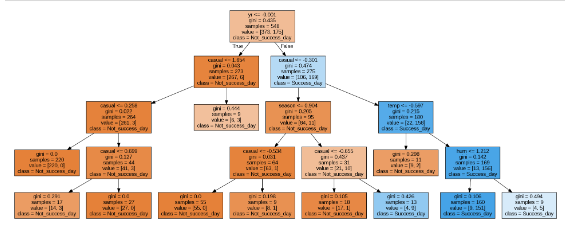

**№7.3** Сравнить лучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier` на тестовой выборке

Все модели ранее были сравнены на тестовой выборке в том числе. Лучшую точность удалось достигнуть с помощью модели дерева решений на наборе призноков, полученных в пункте 6 (путем объединения множеств отфильтрованных признаков каждой модели)